In [31]:
import numpy as np
import matplotlib.pyplot as plt
from hw4 import *
from src.pca import PCA

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
# load date
X_train, y_train = load_data("train")
X_val, y_val = load_data("val")

In [ ]:
# Train pca
pca = PCA(n_components=40)
pca.fit(X_train)
pca.components

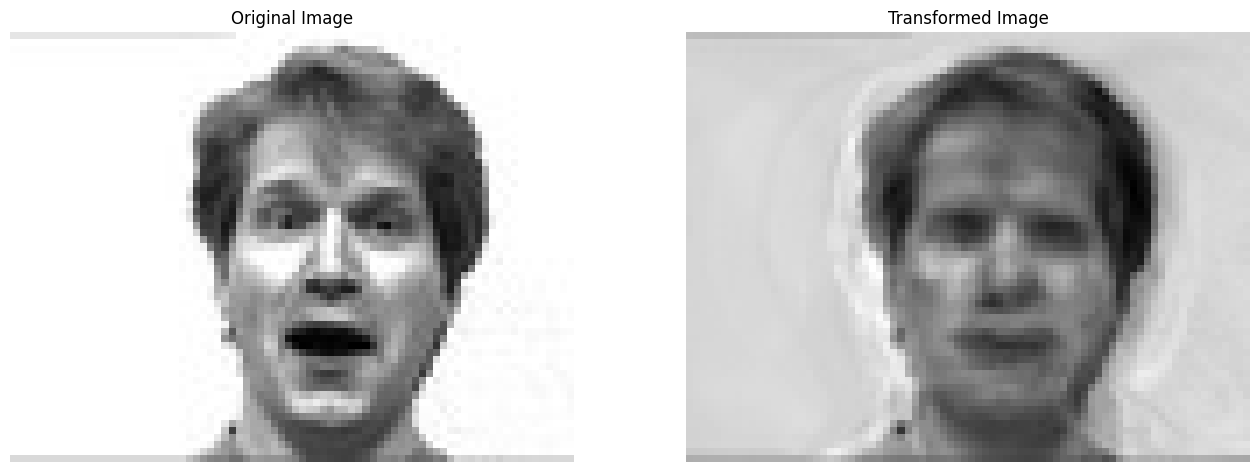

In [43]:
# plot original image

img = read_image()


def plot_image(img, model = pca):

    img_transformed = model.transform(img)
    img_reconstructed = model.reconstruct(img)

    # plot the original and reconstructed images
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))
    axes[0].imshow(np.real(img).reshape(61, 80), cmap='gray')
    axes[0].axis('off')
    axes[0].set_title('Original Image')
    axes[1].imshow(np.real(img_reconstructed).reshape(61, 80), cmap='gray')
    axes[1].axis('off')
    axes[1].set_title('Transformed Image')
    plt.show()

plot_image(img, pca)

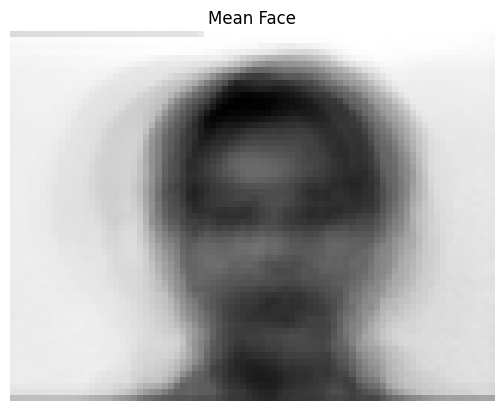

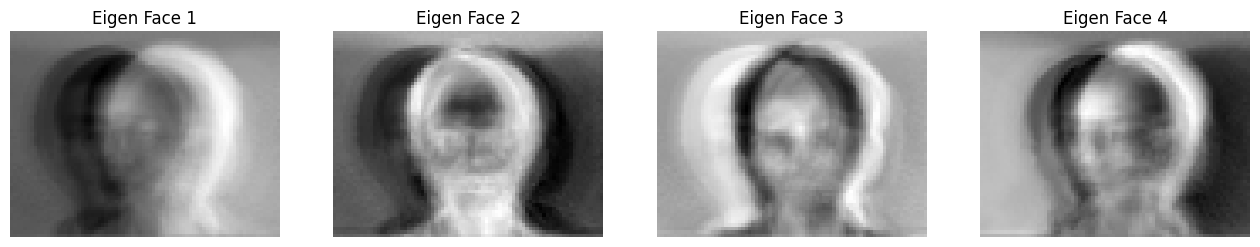

In [ ]:
# (a) plot mean and eigen face

plt.imshow(pca.mean.reshape(61, 80), cmap='gray')
plt.title('Mean Face')
plt.axis('off')
plt.show()

# (b) plot eigen face

fig, axes = plt.subplots(1, 4, figsize=(16, 4))

for i in range(4):
    axes[i].imshow(pca.components[i].reshape(61, 80), cmap='gray')
    axes[i].set_title(f'Eigen Face {i+1}')
    axes[i].axis('off')

plt.show()

In [ ]:
# (b) the training curve for the autoencoder

err_list = []
for epochs in range(10, 50, 10):
    autoencoder = Autoencoder(input_dim=4880, encoding_dim=488)
    autoencoder.fit(X_train, epochs=epochs, batch_size=135)
    err_list.append(autoencoder.loss_list)

plt.plot(err_list)
plt.show()